In [1]:
# imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
# load data
df=pd.read_csv('nba_data.csv')

In [3]:
# look at data
df.head()

,Unnamed: 0,name,pos,age,team,gp,gs,mp,fg,fga,...,trb,ast,stl,blk,tov,fouls,pts,Year,school,selection
0,0,Curly Armstrong,G-F,31,FTW,63,NaN,NaN,2.3,8.2,...,NaN,2.8,NaN,NaN,NaN,3.4,7.3,1950,NaN,NaN
1,1,Cliff Barker,SG,29,INO,49,NaN,NaN,2.1,5.6,...,NaN,2.2,NaN,NaN,NaN,2.0,5.7,1950,NaN,NaN
2,2,Leo Barnhorst,SF,25,CHS,67,NaN,NaN,2.6,7.4,...,NaN,2.1,NaN,NaN,NaN,2.9,6.5,1950,NaN,NaN
3,3,Ed Bartels,F,24,NYK,15,NaN,NaN,1.5,5.7,...,NaN,1.3,NaN,NaN,NaN,1.9,4.2,1950,NaN,NaN
4,4,Ralph Beard,G,22,INO,60,NaN,NaN,5.7,15.6,...,NaN,3.9,NaN,NaN,NaN,2.2,14.9,1950,NaN,NaN


In [4]:
# filter to 30 years
df=df[df.Year>=1980]

In [5]:
df.head()

,Unnamed: 0,name,pos,age,team,gp,gs,mp,fg,fga,...,trb,ast,stl,blk,tov,fouls,pts,Year,school,selection
4766,4766,Kareem Abdul-Jabbar*,C,32,LAL,82,NaN,38.3,10.2,16.9,...,10.8,4.5,1.0,3.4,3.6,2.6,24.8,1980,NaN,NaN
4767,4767,Tom Abernethy,PF,25,GSW,67,NaN,18.2,2.3,4.7,...,2.9,1.3,0.5,0.2,0.6,1.8,5.4,1980,NaN,NaN
4768,4768,Alvan Adams,C,25,PHO,75,NaN,28.9,6.2,11.7,...,8.1,4.3,1.4,0.7,2.9,3.2,14.9,1980,NaN,NaN
4769,4769,Tiny Archibald*,PG,31,BOS,80,80.0,35.8,4.8,9.9,...,2.5,8.4,1.3,0.1,3.0,2.7,14.1,1980,NaN,NaN
4770,4770,Dennis Awtrey,C,31,CHI,26,NaN,21.5,1.0,2.3,...,4.4,1.5,0.5,0.6,1.0,2.5,3.3,1980,NaN,NaN


In [6]:
# look at dtypes and look for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16590 entries, 4766 to 21355
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  16590 non-null  int64  
 1   name        16590 non-null  object 
 2   pos         16590 non-null  object 
 3   age         16590 non-null  int64  
 4   team        16590 non-null  object 
 5   gp          16590 non-null  int64  
 6   gs          16025 non-null  float64
 7   mp          16590 non-null  float64
 8   fg          16590 non-null  float64
 9   fga         16590 non-null  float64
 10  fg%         16539 non-null  float64
 11  3p          16590 non-null  float64
 12  3pa         16590 non-null  float64
 13  3p%         13938 non-null  float64
 14  2p          16590 non-null  float64
 15  2pa         16590 non-null  float64
 16  2p%         16508 non-null  float64
 17  efg%        16539 non-null  float64
 18  ft          16590 non-null  float64
 19  fta         16590 non-

In [7]:
# fill selection null
df.selection.fillna((int(df.selection.mean())+int(df.selection.mean()))/2,inplace=True)

In [8]:
# look at dtypes and look for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16590 entries, 4766 to 21355
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  16590 non-null  int64  
 1   name        16590 non-null  object 
 2   pos         16590 non-null  object 
 3   age         16590 non-null  int64  
 4   team        16590 non-null  object 
 5   gp          16590 non-null  int64  
 6   gs          16025 non-null  float64
 7   mp          16590 non-null  float64
 8   fg          16590 non-null  float64
 9   fga         16590 non-null  float64
 10  fg%         16539 non-null  float64
 11  3p          16590 non-null  float64
 12  3pa         16590 non-null  float64
 13  3p%         13938 non-null  float64
 14  2p          16590 non-null  float64
 15  2pa         16590 non-null  float64
 16  2p%         16508 non-null  float64
 17  efg%        16539 non-null  float64
 18  ft          16590 non-null  float64
 19  fta         16590 non-

In [9]:
# fill na
for col in ['gs','fg%','3p%','2p%','efg%','ft%']:
    df[col].fillna(df[col].mean(),inplace=True)

In [10]:
# look at dtypes and look for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16590 entries, 4766 to 21355
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  16590 non-null  int64  
 1   name        16590 non-null  object 
 2   pos         16590 non-null  object 
 3   age         16590 non-null  int64  
 4   team        16590 non-null  object 
 5   gp          16590 non-null  int64  
 6   gs          16590 non-null  float64
 7   mp          16590 non-null  float64
 8   fg          16590 non-null  float64
 9   fga         16590 non-null  float64
 10  fg%         16590 non-null  float64
 11  3p          16590 non-null  float64
 12  3pa         16590 non-null  float64
 13  3p%         16590 non-null  float64
 14  2p          16590 non-null  float64
 15  2pa         16590 non-null  float64
 16  2p%         16590 non-null  float64
 17  efg%        16590 non-null  float64
 18  ft          16590 non-null  float64
 19  fta         16590 non-

In [11]:
df.head()

,Unnamed: 0,name,pos,age,team,gp,gs,mp,fg,fga,...,trb,ast,stl,blk,tov,fouls,pts,Year,school,selection
4766,4766,Kareem Abdul-Jabbar*,C,32,LAL,82,26.67844,38.3,10.2,16.9,...,10.8,4.5,1.0,3.4,3.6,2.6,24.8,1980,NaN,33.0
4767,4767,Tom Abernethy,PF,25,GSW,67,26.67844,18.2,2.3,4.7,...,2.9,1.3,0.5,0.2,0.6,1.8,5.4,1980,NaN,33.0
4768,4768,Alvan Adams,C,25,PHO,75,26.67844,28.9,6.2,11.7,...,8.1,4.3,1.4,0.7,2.9,3.2,14.9,1980,NaN,33.0
4769,4769,Tiny Archibald*,PG,31,BOS,80,80.00000,35.8,4.8,9.9,...,2.5,8.4,1.3,0.1,3.0,2.7,14.1,1980,NaN,33.0
4770,4770,Dennis Awtrey,C,31,CHI,26,26.67844,21.5,1.0,2.3,...,4.4,1.5,0.5,0.6,1.0,2.5,3.3,1980,NaN,33.0


In [12]:
# get rid of useless data
df.drop('Unnamed: 0',axis=1,inplace=True)

In [13]:
df.head()

,name,pos,age,team,gp,gs,mp,fg,fga,fg%,...,trb,ast,stl,blk,tov,fouls,pts,Year,school,selection
4766,Kareem Abdul-Jabbar*,C,32,LAL,82,26.67844,38.3,10.2,16.9,0.604,...,10.8,4.5,1.0,3.4,3.6,2.6,24.8,1980,NaN,33.0
4767,Tom Abernethy,PF,25,GSW,67,26.67844,18.2,2.3,4.7,0.481,...,2.9,1.3,0.5,0.2,0.6,1.8,5.4,1980,NaN,33.0
4768,Alvan Adams,C,25,PHO,75,26.67844,28.9,6.2,11.7,0.531,...,8.1,4.3,1.4,0.7,2.9,3.2,14.9,1980,NaN,33.0
4769,Tiny Archibald*,PG,31,BOS,80,80.00000,35.8,4.8,9.9,0.482,...,2.5,8.4,1.3,0.1,3.0,2.7,14.1,1980,NaN,33.0
4770,Dennis Awtrey,C,31,CHI,26,26.67844,21.5,1.0,2.3,0.450,...,4.4,1.5,0.5,0.6,1.0,2.5,3.3,1980,NaN,33.0


In [14]:
# deal with categorical data
df.select_dtypes(include='O')

,name,pos,team,school
4766,Kareem Abdul-Jabbar*,C,LAL,NaN
4767,Tom Abernethy,PF,GSW,NaN
4768,Alvan Adams,C,PHO,NaN
4769,Tiny Archibald*,PG,BOS,NaN
4770,Dennis Awtrey,C,CHI,NaN
...,...,...,...,...
21351,Trae Young,PG,ATL,Oklahoma
21352,Cody Zeller,C,CHO,Indiana
21353,Tyler Zeller,C,MEM,North Carolina
21354,Ante Žižić,C,CLE,NaN


In [15]:
# get rid of weird name add-ons
for i in range(len(df)):
    if '*' in df.name.iloc[i]:
        df.name.iloc[i]=df.name.iloc[i].replace('*','')

In [16]:
# any weird values now?
for i in range(len(df)):
    if df.pos.iloc[i] not in ['PG','SG','SF','PF','C']:
        print(df.name.iloc[i],df.pos.iloc[i])

Lionel Hollins SG-PG
Eric Money SG-PG
Bingo Smith SF-SG
Terry Duerod SG-SF
Scott Hastings C-PF
Jim Johnstone PF-C
Billy Knight SF-SG
Dale Wilkinson SF-PF
Michael Holton PG-SG
Brian Martin SF-PF
Walter Berry SF-PF
Frank Brickowski PF-C
Anthony Jones SF-SG
Michael Wilson SG-PG
Mike McGee SF-SG
Andre Moore PF-SF
Ralph Sampson C-PF
Tony Brown SF-SG
Jim Rowinski PF-C
Nate Johnston PF-SF
Ralph Lewis SG-SF
Mike Williams PF-SF
Tony Brown SG-SF
Mario Elie SF-SG
Rex Chapman PG-SG
Sean Higgins PF-SF
John Morton SF-SG
Kennard Winchester SF-SG
Steve Kerr SG-PG
Alex Stivrins PF-SF
Darrell Walker PG-SG
Lorenzo Williams PF-C
Tom Gugliotta PF-SF
Jay Humphries SG-PG
Michael Curry SG-SF
Herb Williams PF-C
Jamie Feick PF-C
Jim Jackson SG-SF
Ruben Nembhard SG-PG
Aaron Williams PF-C
Aaron McKie SG-SF
Jerry Stackhouse SG-SF
Terry Dehere SG-PG
Jamie Feick PF-C
Eddie Jones SF-SG
Rodrick Rhodes SG-SF
Chris Carr SF-SG
Bill Curley SF-PF
Billy Owens PF-SF
Christian Laettner C-PF
Felipe López SG-PG
Tyrone Nesby SF-

In [17]:
# replace weird values
for i in range(len(df)):
    if df.pos.iloc[i][0]=='C':
        df.pos.iloc[i]='C'
    elif df.pos.iloc[i][0:2] == 'PF':
        df.pos.iloc[i]='PF'
    elif df.pos.iloc[i][0:2] == 'SF':
        df.pos.iloc[i]='SF'
    elif df.pos.iloc[i][0:2] == 'SG':
        df.pos.iloc[i]='SG'
    else:
        df.pos.iloc[i]='PG'

In [18]:
# any weird values now?
for i in range(len(df)):
    if df.pos.iloc[i] not in ['PG','SG','SF','PF','C']:
        print(df.name.iloc[i],df.pos.iloc[i])

In [19]:
# nope

In [20]:
# categorical data
df.select_dtypes(include='O')

,name,pos,team,school
4766,Kareem Abdul-Jabbar,C,LAL,NaN
4767,Tom Abernethy,PF,GSW,NaN
4768,Alvan Adams,C,PHO,NaN
4769,Tiny Archibald,PG,BOS,NaN
4770,Dennis Awtrey,C,CHI,NaN
...,...,...,...,...
21351,Trae Young,PG,ATL,Oklahoma
21352,Cody Zeller,C,CHO,Indiana
21353,Tyler Zeller,C,MEM,North Carolina
21354,Ante Žižić,C,CLE,NaN


In [21]:
df.head()

,name,pos,age,team,gp,gs,mp,fg,fga,fg%,...,trb,ast,stl,blk,tov,fouls,pts,Year,school,selection
4766,Kareem Abdul-Jabbar,C,32,LAL,82,26.67844,38.3,10.2,16.9,0.604,...,10.8,4.5,1.0,3.4,3.6,2.6,24.8,1980,NaN,33.0
4767,Tom Abernethy,PF,25,GSW,67,26.67844,18.2,2.3,4.7,0.481,...,2.9,1.3,0.5,0.2,0.6,1.8,5.4,1980,NaN,33.0
4768,Alvan Adams,C,25,PHO,75,26.67844,28.9,6.2,11.7,0.531,...,8.1,4.3,1.4,0.7,2.9,3.2,14.9,1980,NaN,33.0
4769,Tiny Archibald,PG,31,BOS,80,80.00000,35.8,4.8,9.9,0.482,...,2.5,8.4,1.3,0.1,3.0,2.7,14.1,1980,NaN,33.0
4770,Dennis Awtrey,C,31,CHI,26,26.67844,21.5,1.0,2.3,0.450,...,4.4,1.5,0.5,0.6,1.0,2.5,3.3,1980,NaN,33.0


In [22]:
# ok - so I see two ways to do this project:
# 1) do it by individual player
# 2) group by team
# I will try both and see what I find
# however it now occurs to me that I will need a lot more data to do a team analysis - so that might be put off for a bit

In [23]:
# this notebook is to group by team

In [24]:
# code for NOW when grouping by teams - ignore at the moment
# .agg({'A': 'sum','B': 'sum','C': lambda x: np.unique(x)}).reset_index()

In [25]:
df.head()

,name,pos,age,team,gp,gs,mp,fg,fga,fg%,...,trb,ast,stl,blk,tov,fouls,pts,Year,school,selection
4766,Kareem Abdul-Jabbar,C,32,LAL,82,26.67844,38.3,10.2,16.9,0.604,...,10.8,4.5,1.0,3.4,3.6,2.6,24.8,1980,NaN,33.0
4767,Tom Abernethy,PF,25,GSW,67,26.67844,18.2,2.3,4.7,0.481,...,2.9,1.3,0.5,0.2,0.6,1.8,5.4,1980,NaN,33.0
4768,Alvan Adams,C,25,PHO,75,26.67844,28.9,6.2,11.7,0.531,...,8.1,4.3,1.4,0.7,2.9,3.2,14.9,1980,NaN,33.0
4769,Tiny Archibald,PG,31,BOS,80,80.00000,35.8,4.8,9.9,0.482,...,2.5,8.4,1.3,0.1,3.0,2.7,14.1,1980,NaN,33.0
4770,Dennis Awtrey,C,31,CHI,26,26.67844,21.5,1.0,2.3,0.450,...,4.4,1.5,0.5,0.6,1.0,2.5,3.3,1980,NaN,33.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16590 entries, 4766 to 21355
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       16590 non-null  object 
 1   pos        16590 non-null  object 
 2   age        16590 non-null  int64  
 3   team       16590 non-null  object 
 4   gp         16590 non-null  int64  
 5   gs         16590 non-null  float64
 6   mp         16590 non-null  float64
 7   fg         16590 non-null  float64
 8   fga        16590 non-null  float64
 9   fg%        16590 non-null  float64
 10  3p         16590 non-null  float64
 11  3pa        16590 non-null  float64
 12  3p%        16590 non-null  float64
 13  2p         16590 non-null  float64
 14  2pa        16590 non-null  float64
 15  2p%        16590 non-null  float64
 16  efg%       16590 non-null  float64
 17  ft         16590 non-null  float64
 18  fta        16590 non-null  float64
 19  ft%        16590 non-null  float64
 20  orb

In [27]:
# create new data frame
df=df.groupby(['Year','team'],as_index=False).mean()

In [28]:
# new data frame preview
df.head()

,Year,team,age,gp,gs,mp,fg,fga,fg%,3p,...,orb,drb,trb,ast,stl,blk,tov,fouls,pts,selection
0,1980,ATL,26.153846,65.153846,26.678440,21.669231,3.438462,7.561538,0.427769,0.015385,...,1.407692,2.507692,3.907692,2.146154,0.838462,0.553846,1.661538,2.461538,9.076923,34.923077
1,1980,BOS,27.583333,70.416667,34.166667,23.225000,4.300000,8.900000,0.479083,0.191667,...,1.358333,2.766667,4.133333,2.500000,0.916667,0.350000,1.725000,2.275000,10.958333,31.250000
2,1980,CHI,26.714286,56.714286,26.678440,21.921429,3.571429,7.414286,0.465786,0.071429,...,1.114286,2.642857,3.764286,2.278571,0.742857,0.471429,1.707143,2.392857,9.371429,33.000000
3,1980,CLE,27.538462,64.769231,26.678440,22.369231,4.169231,8.923077,0.450615,0.038462,...,1.415385,2.623077,4.030769,2.538462,0.907692,0.400000,1.615385,2.200000,10.269231,33.000000
4,1980,DEN,26.461538,60.923077,26.678440,22.861538,3.961538,8.661538,0.448308,0.076923,...,1.584615,2.723077,4.307692,2.200000,0.784615,0.707692,1.692308,2.230769,10.076923,33.000000


In [29]:
# ok - so now I will have to manually add who made the playoffs

In [30]:
# I think I'll just create a list with values like 'GSW 2018' and see if str(team)+' '+str(year) are in the list

In [31]:
# first I need a list of teams
set(df.team.unique())

{'ATL',
 'BOS',
 'BRK',
 'CHA',
 'CHH',
 'CHI',
 'CHO',
 'CLE',
 'DAL',
 'DEN',
 'DET',
 'GSW',
 'HOU',
 'IND',
 'KCK',
 'LAC',
 'LAL',
 'MEM',
 'MIA',
 'MIL',
 'MIN',
 'NJN',
 'NOH',
 'NOK',
 'NOP',
 'NYK',
 'OKC',
 'ORL',
 'PHI',
 'PHO',
 'POR',
 'SAC',
 'SAS',
 'SDC',
 'SEA',
 'TOR',
 'UTA',
 'VAN',
 'WAS',
 'WSB'}

In [32]:
# the above step is important as team names change over time

In [33]:
# let's make this list by first getting every team playoff years and then running a loop
playoffs={'ATL':[1980, 1982, 1983, 1984, 1986, 1987, 1988, 1989, 1991, 1993, 1994, 
       1995, 1996, 1997, 1998, 1999, 2008, 2009, 2010, 2011, 2012, 2013, 
       2014, 2015, 2016, 2017],
'BOS':[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 
         1991, 1992, 1993, 1995, 2002, 2003, 2004, 2005,2008, 2009, 2010, 
         2011 , 2012, 2013, 2015, 2016, 2017, 2018, 2019],
'BRK':[2013, 2014, 2015, 2019],
# notice how we do two rounds of. hornets for the team change - CHO is the new team and CHH is probably the old one
'CHA':[2010,2014],
'CHH':[1993, 1995, 1997, 1998, 2000, 2001, 2002],
'CHO':[2016],
'CHI':[1981, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 
       1998, 2005, 2006, 2007, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
'CLE':[1985, 1988, 1989, 1990, 1992, 1993, 1994, 1995, 1996, 1998, 2006, 2007,2008, 2009, 2010, 2015, 2016, 2017, 2018],
'DAL':[1984, 1985, 1986, 1987, 1988, 1990, 2001, 2002, 2003, 2004, 2005, 
      2006, 2007,2008, 2009, 2010, 2011, 2012, 2014, 2015, 2016],
'DEN':[1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1994, 1995, 2004, 2005, 2006,
     2007,2008, 2009, 2010, 2011, 2012, 2013, 2019],
'DET':[1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1996, 1997, 1999, 2000, 2002, 
       2003, 2004, 2005, 2006, 2007,2008, 2009, 2016, 2019],
'GSW':[1987, 1989, 1991, 1992, 1994, 2007, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
'HOU':[1980, 1981, 1982, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1993, 1994, 1995, 1996, 1997, 
       1998, 1999, 2004, 2005, 2007,2008, 2009, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
'IND':[1981, 1987, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1998, 1999, 2000, 2001, 2002, 
       2003, 2004, 2005, 2006, 2011 , 2012, 2013, 2014, 2016, 2017, 2018, 2019],
'KCK':[1980, 1981, 1984],
'LAC':[1992, 1993, 1997, 2006, 2012, 2013, 2014, 2015, 2016, 2017, 2019],
'LAL':[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2006, 2007,2008, 2009, 2010, 2011, 2012, 2013],
'MEM':[2004, 2005, 2006, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
'MIA':[1992, 1994, 1996, 1997, 1998, 1999, 2000, 2001, 2004, 2005,
       2006, 2007, 2009, 2010, 2011 , 2012, 2013, 2014, 2016, 2018],
'MIL':[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1999, 2000, 2001 ,
       2003, 2004, 2006, 2010, 2011, 2013, 2015, 2017, 2018, 2019],
'MIN':[1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2018],
'NJN':[ 1982, 1983, 1984, 1985, 1986, 1992, 1993, 1994, 1998, 2002, 2003, 2004, 2005, 2006, 2007],
'NOH':[2003, 2004,2008, 2009, 2011],
# hornets OKC year
'NOK':[],
'NOP':[2015, 2018],
'NYK':[1981, 1983, 1984, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2004, 2011, 2012, 2013],
'OKC':[2010, 2011, 2012, 2013, 2014, 2016, 2017, 2018, 2019],
'ORL':[1994, 1995, 1996, 1997, 1999, 2001, 2002, 2003, 2007,2008, 2009, 2010, 2011, 2012, 2019],
'PHI':[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1989, 1990, 1991, 1999,
       2000, 2001, 2002, 2003, 2005,2008, 2009, 2011, 2012, 2018, 2019],
'PHO':[1980, 1981, 1982, 1983, 1984, 1985, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 
       2000, 2001, 2003, 2005, 2006, 2007,2008, 2010],
'POR':[1980, 1981, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2009, 2010, 2011, 2014, 2015, 2016, 2018, 2019],
'SAC':[1986, 1996, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006],
'SAS':[ 1980, 1981, 1982, 1983, 1985, 1986, 1988, 1990, 1991, 1992, 1993, 1994, 
       1995, 1996, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007,2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
'SDC':[],
'SEA':[1980, 1982, 1983, 1984, 1987, 1988, 1989, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 2000, 2002, 2005],
'TOR':[2000, 2001, 2002, 2007,2008, 2014, 2015, 2016, 2017, 2018, 2019],
'UTA':[1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 
       2002, 2003, 2007,2008, 2009, 2010, 2012, 2017, 2018, 2019],
'VAN':[],
'WAS':[2005, 2006, 2007,2008, 2014, 2015, 2017, 2018],
'WSB':[1980, 1982, 1984, 1985, 1986, 1987, 1988, 1997]
}

In [34]:
# create one more list to make this work
team_and_yr_playoffs=[]
for key in playoffs.keys():
    for val in playoffs[key]:
        team_and_yr_playoffs.append(str(key)+' '+str(val))
# preview of end of list
print(len(team_and_yr_playoffs))
team_and_yr_playoffs[::-1][0:10]

623


['WSB 1997',
 'WSB 1988',
 'WSB 1987',
 'WSB 1986',
 'WSB 1985',
 'WSB 1984',
 'WSB 1982',
 'WSB 1980',
 'WAS 2018',
 'WAS 2017']

In [35]:
# ok - i appear to missing a team.... and that team is the bulls in 2017 - Jimmy Butler's last year :(   - sad times
team_and_yr_playoffs.append('CHI 2017')

In [36]:
# does the length of the list sound right?
len(team_and_yr_playoffs)==16*39

True

In [37]:
# add the playoff metric
df['playoffs']=0

In [38]:
# customize the playoff classifier
for i in range(len(df)):
    if (str(df.team.iloc[i])+' '+str(df.Year.iloc[i])) in team_and_yr_playoffs:
        df.playoffs.iloc[i]=1

In [39]:
# now let's check the data with our target feature in place
df.head()

,Year,team,age,gp,gs,mp,fg,fga,fg%,3p,...,drb,trb,ast,stl,blk,tov,fouls,pts,selection,playoffs
0,1980,ATL,26.153846,65.153846,26.678440,21.669231,3.438462,7.561538,0.427769,0.015385,...,2.507692,3.907692,2.146154,0.838462,0.553846,1.661538,2.461538,9.076923,34.923077,1
1,1980,BOS,27.583333,70.416667,34.166667,23.225000,4.300000,8.900000,0.479083,0.191667,...,2.766667,4.133333,2.500000,0.916667,0.350000,1.725000,2.275000,10.958333,31.250000,1
2,1980,CHI,26.714286,56.714286,26.678440,21.921429,3.571429,7.414286,0.465786,0.071429,...,2.642857,3.764286,2.278571,0.742857,0.471429,1.707143,2.392857,9.371429,33.000000,0
3,1980,CLE,27.538462,64.769231,26.678440,22.369231,4.169231,8.923077,0.450615,0.038462,...,2.623077,4.030769,2.538462,0.907692,0.400000,1.615385,2.200000,10.269231,33.000000,0
4,1980,DEN,26.461538,60.923077,26.678440,22.861538,3.961538,8.661538,0.448308,0.076923,...,2.723077,4.307692,2.200000,0.784615,0.707692,1.692308,2.230769,10.076923,33.000000,0


## EDA

## END EDA

In [40]:
# we no longer need team names or years
df.drop(['Year','team'],axis=1,inplace=True)

In [41]:
# split X and y
X=df.drop('playoffs',axis=1)
y=df.playoffs

In [42]:
# instantiate algorithm
rf=RandomForestClassifier(random_state=14)

In [43]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=14)

TRAIN
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       478

    accuracy                           1.00       828
   macro avg       1.00      1.00      1.00       828
weighted avg       1.00      1.00      1.00       828



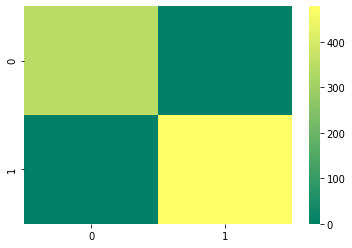

--------------------------------------------------
--------------------------------------------------
TEST
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.65      0.73       130
           1       0.74      0.87      0.80       146

    accuracy                           0.77       276
   macro avg       0.78      0.76      0.76       276
weighted avg       0.78      0.77      0.76       276



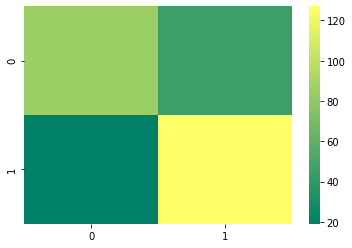

In [44]:
# fit and test model
rf.fit(X_train,y_train)
pred_r=rf.predict(X_train)
pred_e=rf.predict(X_test)
print('TRAIN')
print('-'*50)
print(classification_report(y_train,pred_r))
(sns.heatmap(confusion_matrix(y_train,pred_r),cmap='summer'))
plt.show()
print('-'*50)
print('-'*50)
print('TEST')
print('-'*50)
print(classification_report(y_test,pred_e))
(sns.heatmap(confusion_matrix(y_test,pred_e),cmap='summer'))
plt.show()

In [45]:
# ok - so this a good start!

In [46]:
# scale, rfe, and transform

In [47]:
# import scaling modules
from sklearn.preprocessing import *

In [48]:
# initialize scalers
pt=PowerTransformer()
qt=QuantileTransformer()
ss=StandardScaler()
ma=MaxAbsScaler()
mm=MinMaxScaler()
rb=RobustScaler()

In [49]:
# function to create scaled data frames
def create_scaled_df(scaler,df):
    new_df=df.copy()
    for col in new_df.columns[0:-1]:
        new_df[col]=scaler.fit_transform(new_df[[col]])
    return new_df

In [50]:
# using above function to create scaled data frames
pt_df=create_scaled_df(pt,df)
qt_df=create_scaled_df(qt,df)
ma_df=create_scaled_df(ma,df)
mm_df=create_scaled_df(mm,df)
ss_df=create_scaled_df(ss,df)
rb_df=create_scaled_df(rb,df)

In [51]:
# this will allow me to see which scaler is best
accuracy_dict={}
i=0
df_lst=['pt_df','qt_df','ss_df','ma_df','mm_df','rb_df']
for frame in [pt_df,qt_df,ss_df,ma_df,mm_df,rb_df]:
    x_temp=frame.drop('playoffs',axis=1)
    y_temp=frame.playoffs
    
    X_train_t,X_test_t,y_train_t,y_test_t=train_test_split(x_temp,y_temp,test_size=0.25,random_state=14)
    
    rf.fit(X_train_t,y_train_t)
    pred_e_t=rf.predict(X_test_t)

    accuracy_dict[df_lst[i]]=f'a:{accuracy_score(pred_e_t,y_test_t)},p:{precision_score(pred_e_t,y_test_t)},r:{recall_score(pred_e_t,y_test_t)},f:{f1_score(pred_e_t,y_test_t)}'
    i=i+1

In [52]:
# results
accuracy_dict

{'pt_df': 'a:0.7681159420289855,p:0.8698630136986302,r:0.7383720930232558,f:0.7987421383647798',
 'qt_df': 'a:0.7681159420289855,p:0.8698630136986302,r:0.7383720930232558,f:0.7987421383647798',
 'ss_df': 'a:0.7681159420289855,p:0.8698630136986302,r:0.7383720930232558,f:0.7987421383647798',
 'ma_df': 'a:0.7681159420289855,p:0.8698630136986302,r:0.7383720930232558,f:0.7987421383647798',
 'mm_df': 'a:0.7681159420289855,p:0.8698630136986302,r:0.7383720930232558,f:0.7987421383647798',
 'rb_df': 'a:0.7681159420289855,p:0.8698630136986302,r:0.7383720930232558,f:0.7987421383647798'}

In [53]:
# they all look the same

In [54]:
# split X and y using standard scaling
X=ss_df.drop('playoffs',axis=1)
y=ss_df.playoffs

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=14)

TRAIN
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       478

    accuracy                           1.00       828
   macro avg       1.00      1.00      1.00       828
weighted avg       1.00      1.00      1.00       828



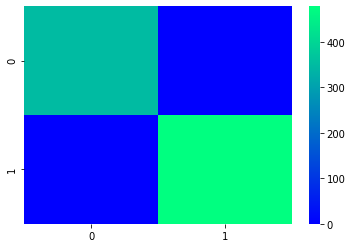

--------------------------------------------------
--------------------------------------------------
TEST
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.65      0.73       130
           1       0.74      0.87      0.80       146

    accuracy                           0.77       276
   macro avg       0.78      0.76      0.76       276
weighted avg       0.78      0.77      0.76       276



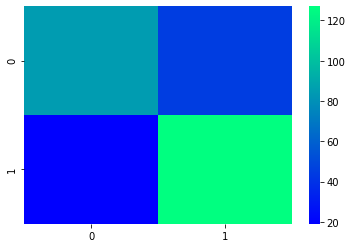

In [56]:
# fit and test model
rf.fit(X_train,y_train)
pred_r=rf.predict(X_train)
pred_e=rf.predict(X_test)
print('TRAIN')
print('-'*50)
print(classification_report(y_train,pred_r))
(sns.heatmap(confusion_matrix(y_train,pred_r),cmap='winter'))
plt.show()
print('-'*50)
print('-'*50)
print('TEST')
print('-'*50)
print(classification_report(y_test,pred_e))
(sns.heatmap(confusion_matrix(y_test,pred_e),cmap='winter'))
plt.show()

In [57]:
# no marginal improvements

In [58]:
# rfe and transform

In [59]:
# import modules
from sklearn.feature_selection import RFE, RFECV

In [60]:
# a visual for how reducing features increases accuracy
rfecv=RFECV(rf)
rfecv.fit(X,y)

RFECV(cv=None,
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=14,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

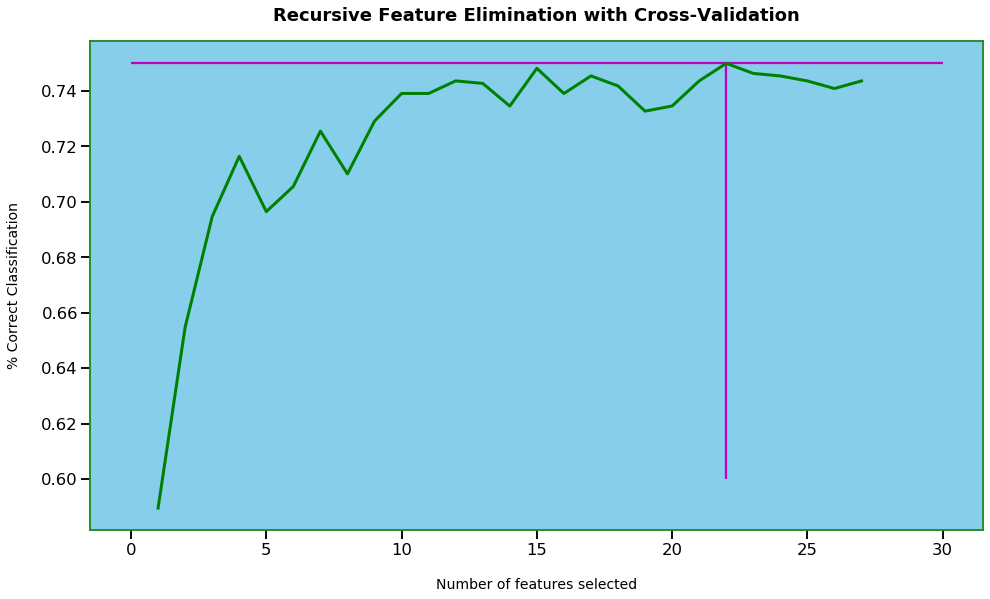

In [61]:
# a visual
with sns.plotting_context('talk'):
    with sns.axes_style({'axes.facecolor':'skyblue','axes.edgecolor':'forestgreen'}):
        plt.figure(figsize=(16, 9))
        plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
        plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
        plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
        plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='green', linewidth=3)
        plt.vlines(22,ymax=0.75,ymin=0.6,colors='m')
        plt.hlines(0.75,xmax=30,xmin=0,colors='m')

        plt.show()

In [62]:
# fit RFE
rfe=RFECV(rf,min_features_to_select=22)
rfe.fit(X,y)
rfe.support_
rfe.ranking_
ss_df.columns

Index(['age', 'gp', 'gs', 'mp', 'fg', 'fga', 'fg%', '3p', '3pa', '3p%', '2p',
       '2pa', '2p%', 'efg%', 'ft', 'fta', 'ft%', 'orb', 'drb', 'trb', 'ast',
       'stl', 'blk', 'tov', 'fouls', 'pts', 'selection', 'playoffs'],
      dtype='object')

In [63]:
# find out what matters and what doesn't
support_dict={}
ranking_dict={}
for i in range(len(rfe.support_)):
    support_dict[ss_df.columns[i]]=int(rfe.support_[i])
for i in range(len(rfe.ranking_)):
    ranking_dict[ss_df.columns[i]]=rfe.ranking_[i]

In [64]:
# results
support_dict

{'age': 1,
 'gp': 1,
 'gs': 1,
 'mp': 1,
 'fg': 0,
 'fga': 1,
 'fg%': 1,
 '3p': 0,
 '3pa': 0,
 '3p%': 0,
 '2p': 1,
 '2pa': 1,
 '2p%': 1,
 'efg%': 1,
 'ft': 1,
 'fta': 1,
 'ft%': 1,
 'orb': 1,
 'drb': 1,
 'trb': 0,
 'ast': 1,
 'stl': 1,
 'blk': 1,
 'tov': 1,
 'fouls': 1,
 'pts': 1,
 'selection': 1}

In [65]:
support_dict.keys()

dict_keys(['age', 'gp', 'gs', 'mp', 'fg', 'fga', 'fg%', '3p', '3pa', '3p%', '2p', '2pa', '2p%', 'efg%', 'ft', 'fta', 'ft%', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'fouls', 'pts', 'selection'])

In [66]:
# let's try again
X = X[['age', 'gp', 'gs', 'mp', 'fga', 'fg%', '2p', 
       '2pa', '2p%', 'efg%', 'ft', 'fta', 'ft%', 'orb', 'drb', 
        'ast', 'stl', 'blk', 'tov', 'fouls', 'pts', 'selection']]

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=14)

TRAIN
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       478

    accuracy                           1.00       828
   macro avg       1.00      1.00      1.00       828
weighted avg       1.00      1.00      1.00       828



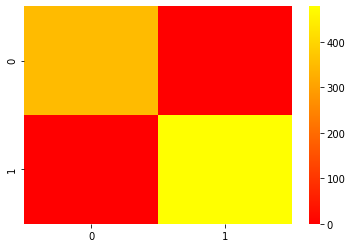

--------------------------------------------------
--------------------------------------------------
TEST
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.66      0.74       130
           1       0.75      0.88      0.81       146

    accuracy                           0.78       276
   macro avg       0.79      0.77      0.77       276
weighted avg       0.79      0.78      0.78       276



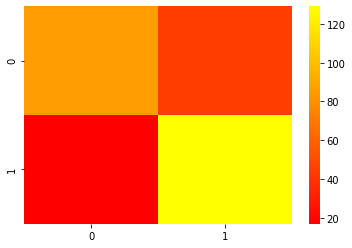

In [68]:
# fit and test model
rf.fit(X_train,y_train)
pred_r=rf.predict(X_train)
pred_e=rf.predict(X_test)
print('TRAIN')
print('-'*50)
print(classification_report(y_train,pred_r))
(sns.heatmap(confusion_matrix(y_train,pred_r),cmap='autumn'))
plt.show()
print('-'*50)
print('-'*50)
print('TEST')
print('-'*50)
print(classification_report(y_test,pred_e))
(sns.heatmap(confusion_matrix(y_test,pred_e),cmap='autumn'))
plt.show()

In [69]:
# okay - another marginal improvement

In [70]:
# gridsearch